In [1]:
import pandas as pd
import numpy as np


# EDA

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Score,Text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...


In [4]:
print(train.columns)
print(train["Score"].value_counts())

Index(['Score', 'Text'], dtype='object')
Score
5    197151
4     43876
1     28521
3     23296
2     16287
Name: count, dtype: int64


In [5]:
valid_score = {1, 2, 3, 4, 5}
unique_score = set(train["Score"].unique())

# Find invalid sentiment labels
invalid_score = unique_score - valid_score

if invalid_score:
    print("Unexpected score labels found:", invalid_score)
    invalid_rows = train[train["Score"].isin(invalid_score)]
    print(invalid_rows)
else:
    print("All sentiments are correctly labeled.")

All sentiments are correctly labeled.


In [6]:
train.describe()

,Score
count,309131.000000
mean,4.180241
std,1.312151
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_11700\1363575255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Score"], palette="viridis")


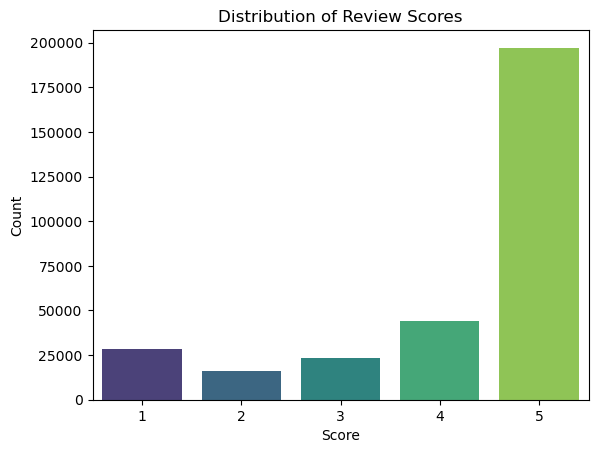

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train["Score"], palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


In [9]:
train['length']=train['Text'].apply(len)
train.head()

,Score,Text,length
0,5,I received this product early from the seller!...,197
1,5,*****<br />Numi's Collection Assortment Melang...,1938
2,5,"I was very careful not to overcook this pasta,...",1084
3,5,Buying this multi-pack I was misled by the pic...,186
4,5,These bars are so good! I loved them warmed up...,155


C:\Users\Athin Suresh\AppData\Local\Temp\ipykernel_11700\1063189245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")


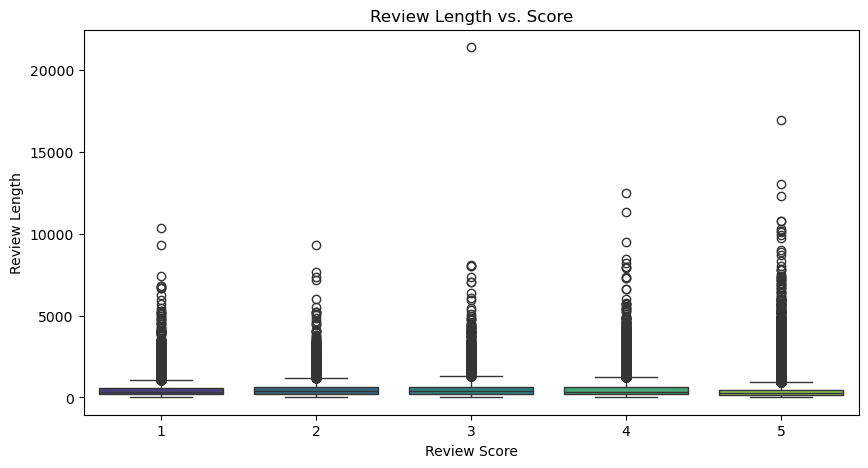

In [10]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=train["Score"], y=train["length"], palette="viridis")
plt.title("Review Length vs. Score")
plt.xlabel("Review Score")
plt.ylabel("Review Length")
plt.show()

In [11]:
train[["Score", "length"]].corr()

,Score,length
Score,1.000000,-0.068981
length,-0.068981,1.000000


In [12]:
train.head()


,Score,Text,length
0,5,I received this product early from the seller!...,197
1,5,*****<br />Numi's Collection Assortment Melang...,1938
2,5,"I was very careful not to overcook this pasta,...",1084
3,5,Buying this multi-pack I was misled by the pic...,186
4,5,These bars are so good! I loved them warmed up...,155


In [13]:
test = pd.read_csv('test.csv')
test.head()

,Id,Text
0,0,Fog chaser was the best both in flavor and bod...
1,1,"We found this at PF Changs, and it tastes just..."
2,2,Not quite a chocolate bar substitute but delic...
3,3,This is not as tasty as Pamela's Almond Biscot...
4,4,"<a href=""http://www.amazon.com/gp/product/B000..."


# Topic Modelling

## Text Processing

In [17]:
one_star_df = train[train["Score"] == 1]
five_star_df = train[train["Score"] == 5]

# Sample 20,000 reviews from each subset
one_star_sampled = one_star_df.sample(n=20000, random_state=42)  # Use random_state for reproducibility
five_star_sampled = five_star_df.sample(n=20000, random_state=42)

In [18]:
print("One-star sample size:", one_star_sampled.shape[0])
print("Five-star sample size:", five_star_sampled.shape[0])

One-star sample size: 20000
Five-star sample size: 20000


In [19]:
one_star_sampled.head()

,Score,Text,length
137270,1,Im sorry but these are horrible They taste bu...,314
184706,1,Look at the ingredients water wheat salt suga...,193
25238,1,Thats right I thought that price was for a Cas...,151
37407,1,have bought this product on two different occa...,221
113937,1,These walnuts were SO GROSS they tasted rancid...,207


In [20]:
import string
one_star_sampled['Text'] = one_star_sampled['Text'].str.translate(str.maketrans('', '', string.punctuation))
five_star_sampled['Text'] = five_star_sampled['Text'].str.translate(str.maketrans('', '', string.punctuation))

In [21]:
one_star_sampled['Text'] = one_star_sampled['Text'].str.replace(r'\d+', '', regex=True)
five_star_sampled['Text'] = five_star_sampled['Text'].str.replace(r'\d+', '', regex=True)


In [22]:
import nltk
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords') #make sure the stopwords are downloaded.

def expand_and_remove_stopwords(text):
    expanded_text = contractions.fix(text) #expands the contractions
    stop_words = set(stopwords.words('english'))
    words = expanded_text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words] #make sure words are lower case for comparison.
    return ' '.join(filtered_words)

one_star_sampled['Text'] = one_star_sampled['Text'].apply(expand_and_remove_stopwords)
five_star_sampled['Text'] = five_star_sampled['Text'].apply(expand_and_remove_stopwords)
one_star_sampled.head()
five_star_sampled.head()

[nltk_data] Downloading package stopwords to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Score,Text,length
115121,5,ALMOST GOOD FRESH SURE SEARCH AROUND GOOD BUTT...,206
259983,5,multiple trials various dry dog foods one food...,445
304052,5,searched ages drink watersoda water various sw...,505
104143,5,anxiously awaiting flavor coffee YUM YUM YUM r...,258
39184,5,never hold box house day kids devour soon goes...,225


In [23]:
one_star_sampled.head()

,Score,Text,length
137270,1,sorry horrible taste burnt bitter neither husb...,314
184706,1,Look ingredients water wheat salt sugar soy in...,193
25238,1,right thought price Case sixbr beyond Greed In...,151
37407,1,bought product two different occasion times ar...,221
113937,1,walnuts GROSS tasted rancid threw garbage hone...,207


In [24]:
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
one_star_sampled['TextTokens'] = one_star_sampled['Text'].apply(word_tokenize)
five_star_sampled['TextTokens'] = five_star_sampled['Text'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [25]:
one_star_sampled.head()

,Score,Text,length,TextTokens
137270,1,sorry horrible taste burnt bitter neither husb...,314,"[sorry, horrible, taste, burnt, bitter, neithe..."
184706,1,Look ingredients water wheat salt sugar soy in...,193,"[Look, ingredients, water, wheat, salt, sugar,..."
25238,1,right thought price Case sixbr beyond Greed In...,151,"[right, thought, price, Case, sixbr, beyond, G..."
37407,1,bought product two different occasion times ar...,221,"[bought, product, two, different, occasion, ti..."
113937,1,walnuts GROSS tasted rancid threw garbage hone...,207,"[walnuts, GROSS, tasted, rancid, threw, garbag..."


In [26]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
one_star_sampled['TextTokens'] = one_star_sampled['TextTokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
five_star_sampled['TextTokens'] = five_star_sampled['TextTokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
one_star_sampled.head()

,Score,Text,length,TextTokens
137270,1,sorry horrible taste burnt bitter neither husb...,314,"[sorry, horrible, taste, burnt, bitter, neithe..."
184706,1,Look ingredients water wheat salt sugar soy in...,193,"[Look, ingredient, water, wheat, salt, sugar, ..."
25238,1,right thought price Case sixbr beyond Greed In...,151,"[right, thought, price, Case, sixbr, beyond, G..."
37407,1,bought product two different occasion times ar...,221,"[bought, product, two, different, occasion, ti..."
113937,1,walnuts GROSS tasted rancid threw garbage hone...,207,"[walnut, GROSS, tasted, rancid, threw, garbage..."


## One-star rating

In [28]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
X_one_star = one_star_sampled['Text']

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.15, min_df=2, stop_words='english', max_features=5000)
X_dtm = vectorizer.fit_transform(X_one_star)

In [30]:
# Apply LDA for topic modeling
lda10 = LatentDirichletAllocation(n_components=10, random_state=42) 
lda15 = LatentDirichletAllocation(n_components=15, random_state=42) 
lda20 = LatentDirichletAllocation(n_components=20, random_state=42)
lda10.fit(X_dtm)
lda15.fit(X_dtm)
lda20.fit(X_dtm)
# Get feature names (words)
words = np.array(vectorizer.get_feature_names_out())
# Sorting logic (from previous code)
sorting = np.argsort(lda10.components_, axis=1)[:, ::-1]  # Sort words by importance for each topic

In [31]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]  # Extract top words
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda10, words, num_words=10)


🔹 Topic 1:
flavor, water, tastes, drink, sweet, really, sugar, milk, better, stuff

🔹 Topic 2:
coffee, cup, flavor, beans, kcups, cups, tried, vanilla, machine, pods

🔹 Topic 3:
chocolate, box, cookies, butter, bars, candy, bar, peanut, chips, sugar

🔹 Topic 4:
free, mix, gluten, bread, hair, really, tried, salt, gum, cake

🔹 Topic 5:
ingredients, sugar, organic, corn, natural, ingredient, syrup, products, oil, contains

🔹 Topic 6:
amazon, order, ordered, price, received, box, item, shipping, store, company

🔹 Topic 7:
bad, smell, tried, bought, away, tasted, try, time, eat, got

🔹 Topic 8:
food, cat, dog, eat, cats, formula, chicken, baby, dogs, meat

🔹 Topic 9:
dog, treats, dogs, china, treat, small, chicken, pieces, jerky, chew

🔹 Topic 10:
tea, flavor, green, teas, bags, tastes, love, tried, black, quality


In [33]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  # Recompute sorting for the current model
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda15, words, num_words=10)


🔹 Topic 1:
water, milk, flavor, drink, coconut, bottle, fat, new, better, tastes

🔹 Topic 2:
coffee, cup, flavor, kcups, beans, pods, cups, machine, tried, vanilla

🔹 Topic 3:
chocolate, sugar, cookies, sweet, bars, bar, hot, artificial, cookie, cocoa

🔹 Topic 4:
organic, hair, formula, gum, use, baby, licorice, products, used, best

🔹 Topic 5:
ingredients, corn, syrup, sugar, ingredient, natural, list, contains, products, label

🔹 Topic 6:
amazon, price, order, store, item, ordered, shipping, received, local, oz

🔹 Topic 7:
bad, smell, got, time, bought, try, really, tasted, batch, opened

🔹 Topic 8:
food, cat, dog, cats, eat, dogs, meat, chicken, foods, pet

🔹 Topic 9:
dog, treats, dogs, china, treat, chicken, small, products, chew, pieces

🔹 Topic 10:
tea, green, flavor, teas, tastes, lemon, love, tried, drink, bags

🔹 Topic 11:
money, waste, soup, flavor, bought, tasted, away, really, tried, chicken

🔹 Topic 12:
box, ordered, received, arrived, amazon, order, package, opened, bag,

In [34]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  # Recompute sorting for the current model
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda20, words, num_words=10)


🔹 Topic 1:
milk, fat, new, protein, water, original, calories, serving, flavor, grams

🔹 Topic 2:
coffee, cup, flavor, kcups, beans, pods, vanilla, cups, tried, kcup

🔹 Topic 3:
chocolate, cookies, sugar, sweet, bars, hot, bar, cookie, flavor, cocoa

🔹 Topic 4:
baby, formula, hair, gum, use, used, organic, best, using, really

🔹 Topic 5:
syrup, corn, sugar, ingredients, seeds, high, fructose, contains, health, natural

🔹 Topic 6:
price, amazon, store, local, grocery, oz, shipping, pay, pack, bought

🔹 Topic 7:
bad, smell, got, tasted, popcorn, sauce, try, bought, really, batch

🔹 Topic 8:
time, work, water, use, meat, food, used, money, make, bottle

🔹 Topic 9:
butter, peanut, dog, small, chew, hard, treat, pieces, size, toy

🔹 Topic 10:
tea, flavor, green, teas, black, lemon, bags, quality, love, spice

🔹 Topic 11:
money, waste, soup, flavor, salt, away, bought, really, tried, tasted

🔹 Topic 12:
box, cans, arrived, opened, plastic, package, boxes, packaging, broken, bag

🔹 Topic 13:

In [35]:
pip install pyLDAvis

In [36]:
from __future__ import print_function  # Ensures Python 2/3 compatibility (not needed in Python 3).
import pyLDAvis
import pyLDAvis.lda_model  # Importing LDA visualization module.
pyLDAvis.enable_notebook()  # Enables inline visualization in Jupyter Notebook.


In [37]:
pyLDAvis.lda_model.prepare(lda10, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.047174 -0.093364       1        1  18.276800
0     -0.069477  0.113609       2        1  12.571356
6     -0.089317 -0.082360       3        1  12.180393
7      0.124771 -0.050396       4        1  11.312350
1     -0.136125  0.023667       5        1   8.870441
4      0.206968  0.197638       6        1   8.738278
2     -0.104445 -0.045874       7        1   7.670511
9     -0.131013  0.066990       8        1   7.289019
3      0.007508  0.027609       9        1   6.604649
8      0.143956 -0.157520      10        1   6.486204, topic_info=           Term         Freq        Total Category  logprob  loglift
849      coffee  4255.000000  4255.000000  Default  30.0000  30.0000
4460        tea  3079.000000  3079.000000  Default  29.0000  29.0000
1719       food  3961.000000  3961.000000  Default  28.0000  28.0000
769   chocolate  1847.000000  1847.000000  Default  27.0000  27.0000
1317        dog  2030.000000  2030.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3014        old   168.793692  1491.188470  Topic10  -5.4272   0.5568
471      bought   175.392383  2721.866519  Topic10  -5.3889  -0.0066
4538       time   164.378868  2619.247349  Topic10  -5.4537  -0.0330
3258    plastic   145.083119   750.690442  Topic10  -5.5786   1.0918
267        away   145.907233  1636.320760  Topic10  -5.5729   0.3183

[751 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
16        1  0.967296  account
16        5  0.016122  account
19        2  0.042969     acid
19        5  0.204101     acid
19        6  0.748370     acid
...     ...       ...      ...
4894     10  0.004856    white
4963     10  0.926963    xrays
4978      8  0.966473     yogi
4996      6  0.988938     zico
4999     10  0.934683    zukes

[2301 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 7, 8, 2, 5, 3, 10, 4, 9])

In [38]:
pyLDAvis.lda_model.prepare(lda15, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.151826 -0.112111       1        1  11.612609
11    -0.118531 -0.166289       2        1   9.603600
7     -0.111851  0.005013       3        1   8.429446
1      0.113844 -0.052024       4        1   7.427652
6      0.024849 -0.133474       5        1   7.414918
14     0.096421 -0.028722       6        1   6.961906
10     0.127575 -0.030212       7        1   6.614173
12     0.047424  0.093087       8        1   6.178731
4     -0.196485  0.222701       9        1   6.078598
0      0.073299  0.111395      10        1   5.835309
8     -0.164314 -0.068400      11        1   5.223058
9      0.142754  0.001117      12        1   5.161685
2      0.129577  0.080696      13        1   4.543799
3     -0.108358  0.090055      14        1   4.521351
13     0.095622 -0.012832      15        1   4.393165, topic_info=           Term         Freq        Total Category  logprob  loglift
849      coffee  4243.000000  4243.000000  Default  30.0000  30.0000
4460        tea  3101.000000  3101.000000  Default  29.0000  29.0000
769   chocolate  1856.000000  1856.000000  Default  28.0000  28.0000
1719       food  3929.000000  3929.000000  Default  27.0000  27.0000
1317        dog  2013.000000  2013.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4044      small   134.547421  1091.596080  Topic15  -5.2644   1.0316
2799        mix   115.695238   963.867314  Topic15  -5.4153   1.0051
4894      white   107.613873   618.931708  Topic15  -5.4877   1.3757
4627      tried   119.410741  2723.404358  Topic15  -5.3837  -0.0019
2632       make   105.787522  2000.056148  Topic15  -5.5049   0.1856

[1078 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
9         8  0.960557   acai
19        4  0.188824   acid
19        8  0.042753   acid
19        9  0.684042   acid
19       10  0.053441   acid
...     ...       ...    ...
4994     13  0.021059   zero
4994     14  0.017549   zero
4995      8  0.969287  zevia
4996      8  0.990769   zico
4999     11  0.940325  zukes

[4010 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 12, 8, 2, 7, 15, 11, 13, 5, 1, 9, 10, 3, 4, 14])

In [39]:
pyLDAvis.lda_model.prepare(lda20, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.144026 -0.194808       1        1  8.907244
15     0.088052 -0.001694       2        1  7.365491
1     -0.133327 -0.043066       3        1  6.778626
5      0.114729 -0.146384       4        1  6.532003
11     0.071331 -0.197095       5        1  6.499682
10    -0.151541 -0.018402       6        1  6.362395
6     -0.131044 -0.066174       7        1  5.963904
19    -0.051945  0.121104       8        1  5.724678
7      0.016201 -0.044334       9        1  5.250296
14    -0.130196 -0.024790      10        1  5.108510
12     0.010513  0.119154      11        1  4.400990
9     -0.131448 -0.018747      12        1  4.154131
2     -0.157343  0.079766      13        1  3.950378
0      0.001118  0.113102      14        1  3.574511
17     0.083356  0.053322      15        1  3.541895
3      0.066592  0.067364      16        1  3.386427
4      0.185819  0.226597      17        1  3.352704
18     0.232392  0.019078      18        1  3.326061
8     -0.032235 -0.084458      19        1  3.204550
13    -0.095052  0.040465      20        1  2.615523, topic_info=             Term         Freq        Total Category  logprob  loglift
849        coffee  4219.000000  4219.000000  Default  30.0000  30.0000
4460          tea  3108.000000  3108.000000  Default  29.0000  29.0000
769     chocolate  1848.000000  1848.000000  Default  28.0000  28.0000
1317          dog  2008.000000  2008.000000  Default  27.0000  27.0000
3368        price  1841.000000  1841.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
4495      texture    73.771145   764.454639  Topic20  -5.3467   1.3055
3571          red    66.835073   499.526759  Topic20  -5.4455   1.6323
4538         time    75.668022  2618.320660  Topic20  -5.3213   0.0998
2249  ingredients    71.889613  1596.166289  Topic20  -5.3726   0.5435
4744        using    64.764657   898.807739  Topic20  -5.4769   1.0134

[1362 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9         8  0.979335     acai
16        1  0.919930  account
16        3  0.016139  account
16        8  0.048417  account
19        3  0.136557     acid
...     ...       ...      ...
4995      8  0.956605    zevia
4995     11  0.027332    zevia
4996      8  0.016175     zico
4996     17  0.978572     zico
4999     18  0.931768    zukes

[5638 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 16, 2, 6, 12, 11, 7, 20, 8, 15, 13, 10, 3, 1, 18, 4, 5, 19, 9, 14])

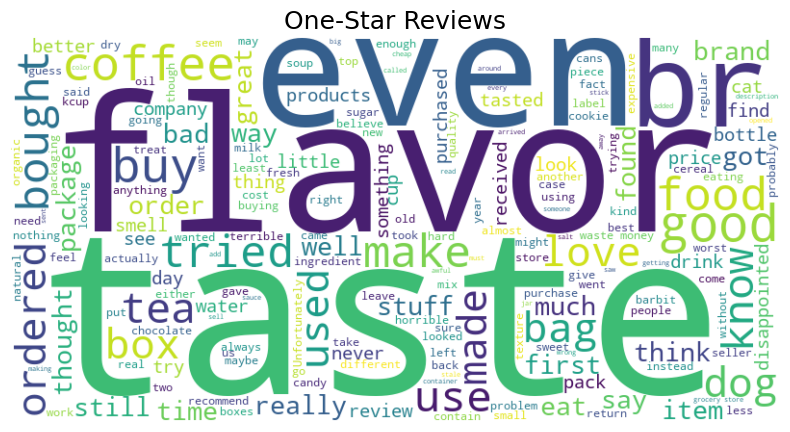

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed one-star reviews into one string
one_star_text = " ".join(one_star_sampled["Text"].astype(str))

# Define stopwords (optional – extend as needed)
stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "would", "get", "one"])  # Optional: add more

# Generate word cloud
one_star_wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=200,
    width=800,
    height=400
).generate(one_star_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(one_star_wc, interpolation='bilinear')
plt.title("One-Star Reviews", fontsize=18)
plt.axis('off')
plt.show()


## Five star rating

In [40]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
X_five_star = five_star_sampled['Text']

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.15, min_df=2, stop_words='english', max_features=5000)
X_dtm = vectorizer.fit_transform(X_five_star)

In [43]:
# Apply LDA for topic modeling
lda10 = LatentDirichletAllocation(n_components=10, random_state=42) 
lda15 = LatentDirichletAllocation(n_components=15, random_state=42) 
lda20 = LatentDirichletAllocation(n_components=20, random_state=42)
lda10.fit(X_dtm)
lda15.fit(X_dtm)
lda20.fit(X_dtm)
# Get feature names (words)
words = np.array(vectorizer.get_feature_names_out())
# Sorting logic (from previous code)
sorting = np.argsort(lda10.components_, axis=1)[:, ::-1]  # Sort words by importance for each topic

In [44]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]  # Extract top words
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda10, words, num_words=10)


🔹 Topic 1:
sweet, cereal, sugar, candy, cookies, really, little, fruit, eat, flavors

🔹 Topic 2:
oil, use, coconut, sugar, rice, water, fresh, syrup, price, oz

🔹 Topic 3:
amazon, price, buy, store, order, time, local, stores, shipping, bought

🔹 Topic 4:
tea, drink, green, teas, water, cup, popcorn, hot, best, make

🔹 Topic 5:
sauce, hot, salt, water, honey, spicy, heat, pepper, try, use

🔹 Topic 6:
chocolate, snack, butter, bars, peanut, eat, chips, healthy, calories, delicious

🔹 Topic 7:
day, milk, organic, use, energy, time, used, baby, days, works

🔹 Topic 8:
food, dog, dogs, cat, treats, loves, cats, eat, treat, old

🔹 Topic 9:
make, mix, use, bread, add, gluten, easy, pasta, used, chicken

🔹 Topic 10:
coffee, cup, beans, tried, best, strong, vanilla, roast, dark, smooth


In [45]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  # Recompute sorting for the current model
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda15, words, num_words=10)


🔹 Topic 1:
sweet, cereal, snack, sugar, eat, cookies, low, breakfast, healthy, ginger

🔹 Topic 2:
rice, fresh, bag, use, price, amazon, store, bags, time, buy

🔹 Topic 3:
amazon, price, order, buy, time, store, bought, ordered, shipping, best

🔹 Topic 4:
tea, green, teas, drink, cup, hot, best, iced, bags, black

🔹 Topic 5:
honey, weight, day, wine, diet, know, really, need, blood, work

🔹 Topic 6:
butter, peanut, nuts, really, seeds, eat, fat, snack, apple, little

🔹 Topic 7:
organic, baby, candy, day, time, formula, milk, used, taking, days

🔹 Topic 8:
food, dog, dogs, treats, loves, eat, old, treat, little, dry

🔹 Topic 9:
use, sauce, make, mix, add, bread, chicken, pasta, used, hot

🔹 Topic 10:
coffee, cup, strong, roast, tried, beans, best, blend, smooth, bold

🔹 Topic 11:
chocolate, bars, gluten, free, bar, best, dark, protein, cake, mix

🔹 Topic 12:
sugar, syrup, sweet, better, gum, flavors, natural, organic, artificial, best

🔹 Topic 13:
water, drink, coconut, use, milk, oil, 

In [46]:
# Display top words in each topic
def display_topics(model, feature_names, num_words=10):
    sorting = np.argsort(model.components_, axis=1)[:, ::-1]  # Recompute sorting for the current model
    for topic_idx, topic in enumerate(model.components_):
        top_words = feature_names[sorting[topic_idx]][:num_words]
        print(f"\n🔹 Topic {topic_idx+1}:")
        print(", ".join(top_words))

display_topics(lda20, words, num_words=10)


🔹 Topic 1:
sweet, candy, ginger, old, caramel, loves, flavors, sugar, licorice, eat

🔹 Topic 2:
rice, use, cook, oatmeal, brown, add, cooking, amazon, years, easy

🔹 Topic 3:
amazon, price, buy, store, shipping, bought, order, best, stores, local

🔹 Topic 4:
tea, green, teas, drink, cup, black, iced, best, hot, strong

🔹 Topic 5:
day, chocolate, night, better, really, know, sleep, wine, people, try

🔹 Topic 6:
butter, peanut, nuts, snack, eat, really, crunchy, almond, granola, nut

🔹 Topic 7:
candy, day, time, organic, baby, stomach, cinnamon, formula, days, milk

🔹 Topic 8:
food, dog, dogs, treats, loves, treat, eat, old, dry, chicken

🔹 Topic 9:
mix, use, make, bread, gluten, add, free, flour, recipe, used

🔹 Topic 10:
coffee, cup, strong, roast, tried, blend, bold, best, smooth, keurig

🔹 Topic 11:
chocolate, bars, bar, dark, delicious, snack, eat, best, favorite, curry

🔹 Topic 12:
sugar, chocolate, cookies, sweet, syrup, cookie, better, gum, free, tried

🔹 Topic 13:
water, drink,

In [47]:
pyLDAvis.lda_model.prepare(lda10, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.065144  0.210842       1        1  16.033375
7      0.187657 -0.017935       2        1  11.725639
8     -0.049493 -0.106510       3        1  11.521681
5     -0.016955 -0.082206       4        1  10.023191
0      0.009050 -0.043391       5        1   8.982128
1     -0.001111  0.026828       6        1   8.854490
9     -0.141349  0.119873       7        1   8.710048
3     -0.139695  0.027504       8        1   8.670799
6      0.136206 -0.013480       9        1   8.250571
4     -0.049454 -0.121525      10        1   7.228079, topic_info=           Term         Freq        Total Category  logprob  loglift
4438        tea  4754.000000  4754.000000  Default  30.0000  30.0000
855      coffee  4379.000000  4379.000000  Default  29.0000  29.0000
1703       food  3573.000000  3573.000000  Default  28.0000  28.0000
1304        dog  1670.000000  1670.000000  Default  27.0000  27.0000
773   chocolate  1943.000000  1943.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4724       used   175.499374  1934.879949  Topic10  -5.3917   0.2270
4843        way   159.502429  1494.544189  Topic10  -5.4873   0.3897
2546        lot   147.620427  1108.804722  Topic10  -5.5647   0.6108
2596       make   165.832225  2767.451052  Topic10  -5.4483  -0.1875
753     chicken   129.030462   943.156467  Topic10  -5.6993   0.6380

[773 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
21        7  0.268134   acid
21        8  0.007448   acid
21        9  0.670335   acid
21       10  0.052137   acid
33        9  0.977188    acv
...     ...       ...    ...
4968      7  0.023111   yogi
4968      8  0.947536   yogi
4990      5  0.962397  zevia
4991      6  0.973682   zico
4992      9  0.977690   zinc

[2375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 9, 6, 1, 2, 10, 4, 7, 5])

In [48]:
pyLDAvis.lda_model.prepare(lda15, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.123402 -0.099158       1        1  12.465190
8     -0.073020 -0.022038       2        1  10.181192
7      0.141415  0.114456       3        1   8.882703
12    -0.029161 -0.013577       4        1   7.662631
9     -0.053512 -0.188157       5        1   7.510454
3     -0.082730 -0.151355       6        1   6.610843
1      0.068619 -0.089000       7        1   6.537164
0     -0.130024  0.124499       8        1   5.974368
13     0.001238 -0.015206       9        1   5.876027
11    -0.120216  0.011024      10        1   5.832138
10    -0.114554  0.078094      11        1   5.447782
6      0.130139  0.082138      12        1   4.912222
14     0.182207  0.011139      13        1   4.600407
5     -0.110505  0.108125      14        1   3.962518
4      0.066701  0.049018      15        1   3.544361, topic_info=           Term         Freq        Total Category  logprob  loglift
4438        tea  4730.000000  4730.000000  Default  30.0000  30.0000
855      coffee  4374.000000  4374.000000  Default  29.0000  29.0000
773   chocolate  1949.000000  1949.000000  Default  28.0000  28.0000
1703       food  3572.000000  3572.000000  Default  27.0000  27.0000
1304        dog  1660.000000  1660.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4722        use   107.605432  3205.730791  Topic15  -5.1682  -0.0544
371      better    90.895972  2168.951939  Topic15  -5.3370   0.1675
4728      using    77.127166  1091.927465  Topic15  -5.5012   0.6896
4843        way    77.687923  1494.066675  Topic15  -5.4940   0.3833
4724       used    72.120971  1930.745623  Topic15  -5.5684   0.0525

[1099 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8        10  0.961081    acai
12        6  0.130738  access
12       13  0.828009  access
21        4  0.045443    acid
21        5  0.302957    acid
...     ...       ...     ...
4980     15  0.966604      ys
4990     10  0.970100   zevia
4991      4  0.982850    zico
4992     12  0.952639    zinc
4999      3  0.961521   zukes

[3871 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 8, 13, 10, 4, 2, 1, 14, 12, 11, 7, 15, 6, 5])

In [49]:
pyLDAvis.lda_model.prepare(lda20, X_dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.201096  0.049035       1        1  9.261374
7      0.074186 -0.153821       2        1  7.816150
12    -0.028145  0.026650       3        1  7.062780
9      0.003295  0.163916       4        1  6.643969
8     -0.095250  0.099823       5        1  6.277899
3     -0.045147  0.133337       6        1  6.121364
11    -0.136558  0.013902       7        1  5.263302
17    -0.010658  0.095218       8        1  4.791438
18     0.138636  0.018615       9        1  4.636122
15     0.140560  0.056465      10        1  4.620474
14     0.146786 -0.110406      11        1  4.596888
1      0.017983  0.058747      12        1  4.569479
13    -0.062190 -0.030877      13        1  4.187961
0     -0.051551 -0.040928      14        1  4.048240
19    -0.150054 -0.219684      15        1  3.861589
10    -0.143167 -0.002218      16        1  3.697702
5     -0.105936 -0.022243      17        1  3.349588
16    -0.044254  0.002949      18        1  3.319280
6      0.120289 -0.116827      19        1  3.222023
4      0.030078 -0.021654      20        1  2.652380, topic_info=           Term         Freq        Total Category  logprob  loglift
4438        tea  4707.000000  4707.000000  Default  30.0000  30.0000
855      coffee  4358.000000  4358.000000  Default  29.0000  29.0000
1703       food  3534.000000  3534.000000  Default  28.0000  28.0000
1304        dog  1655.000000  1655.000000  Default  27.0000  27.0000
773   chocolate  1951.000000  1951.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4959      years    65.591210  1525.501148  Topic20  -5.3734   0.4831
4862     weight    56.045204   495.161065  Topic20  -5.5306   1.4510
2894        new    58.174210   784.533604  Topic20  -5.4934   1.0281
3788        say    59.070795   995.816825  Topic20  -5.4781   0.8049
1884        got    59.881579  1227.218422  Topic20  -5.4644   0.6096

[1390 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         1  0.279115   able
1         2  0.055823   able
1         3  0.038766   able
1         4  0.035665   able
1         5  0.031013   able
...     ...       ...    ...
4994     10  0.064785    zip
4994     18  0.691045    zip
4997     16  0.772514   zone
4997     18  0.178272   zone
4999      2  0.964551  zukes

[5971 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 13, 10, 9, 4, 12, 18, 19, 16, 15, 2, 14, 1, 20, 11, 6, 17, 7, 5])

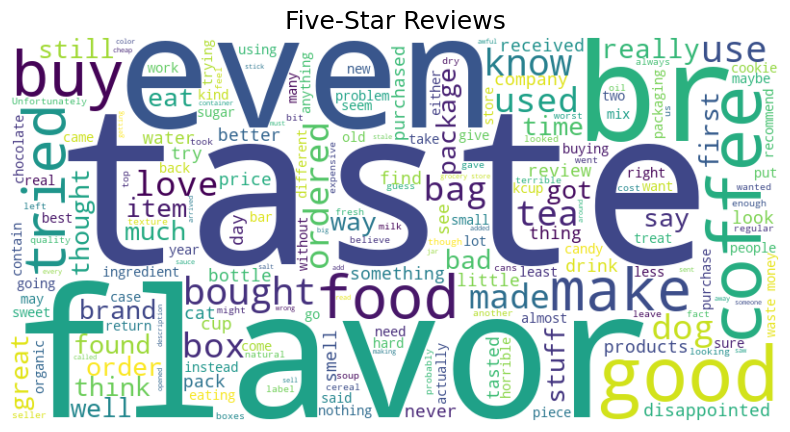

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed one-star reviews into one string
five_star_text = " ".join(five_star_sampled["Text"].astype(str))

# Define stopwords (optional – extend as needed)
stopwords = set(STOPWORDS)
stopwords.update(["product", "amazon", "would", "get", "one"])  # Optional: add more

# Generate word cloud
five_star_wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=200,
    width=800,
    height=400
).generate(one_star_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(one_star_wc, interpolation='bilinear')
plt.title("Five-Star Reviews", fontsize=18)
plt.axis('off')
plt.show()
